In [29]:
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time

# 分三类

# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')

feature=feature.iloc[:, 2:9]
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())
# display(feature)
num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
Kernel='linear'
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                    probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                    max_iter=-1, decision_function_shape=None,random_state=None)
    # 训练模型
    print('Training begin...')
    start=time.clock()
    svm_clf.fit(X_train, y_train) 
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = svm_clf.predict(X_test)
    print('y_predict', y_pre)
    print('y_true', y_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1
        else:
            print('the predict is ',y_pre[i],', but the true is ',y_test[i])
    print('测试集大小', len(y_test))
    print('预测正确个数', sum)
    print('epoch[', k+1, '] ', sum/len(y_test))
    rate.append(sum/len(y_test))
    print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('所用核为：',Kernel)
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)



flag
-1.0     54
 0.0    204
 1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.004125400000020818
y_predict [ 0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.
  0.  0. -1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.
  1.  1.  0.  0.  0.  0.  0. -1.  0.  1.  1.  1. -1. -1.  1.  1.  0.  0.
  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.
 -1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  1.
  1. -1.  1.  1. -1.  1.  0.  0. -1.  1.  1.  1.  0.]
y_true [ 0.  0. -1.  0.  1.  1.  0.  0.  1. -1.  0.  0.  1.  0.  1.  1.  0.  0.
  0.  1. -1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.  0. -1. -1.  0.  1.  1.  1. -1. -1.  1.  1.  0.  0.
  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.
 -1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.
  1. -1.  1.  1. -1.  1.  0.  0. -1.  1.  1.  1.  1.]
the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the tru

the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
测试集大小 103
预测正确个数 94
epoch[ 18 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.002868399999954363
y_predict [ 0.  0. -1.  1.  1. -1.  0. -1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  0. -1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.
  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0. -1.  1. -1.  1. -1.  0.  1.
  0.  0.  0.  0.  1.  0. -1.  0.  1.  1.  0.  0. -1.  0.  0.  0.  0.  1.
  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.
  0.  1. -1. -1. -1.  0.  0.  0.  1. -1.  1.  0.  1.]
y_true [ 0.  0. -1.  1.  1. -1.  0. -1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.
  1.  0.  0. -1.  1.  0.  1.  1. -1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
  0.  1. -1.  1.  0.  0. -1.  1.  1.  0.  0. -1.  1. -1.  1. -1. -1.  1.
  0. -1.  0.  0.  1.  0. -1.  1.  1.  1. -1.  0. -1.  0.  0.  0.  0.  1.
  0.  1.  1.  1.  0. -

the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
测试集大小 103
预测正确个数 88
epoch[ 32 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0032019999999874926
y_predict [ 1.  0.  0. -1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.
  1.  0.  0.  1.  1.  1. -1. -1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.
  0.  0.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0. -1.  1.
  0.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  0.  1.  0.
  0.  1.  0.  1.  1.  1. -1. -1.  1.  1.  0. -1. -1.]
y_true [ 1. -1.  1. -1.  1. -1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.
  1.  0.  0.  0.  1.  1. -1. -1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.
  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1. -1.  0

Training finish
Train Time:  0.004202599999985068
y_predict [ 0.  1.  1. -1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.
  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0. -1.  1.  0.  1.
  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1. -1.  1.  1.  0.  1.  0.
  1.  0.  0. -1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0. -1.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  0.  1. -1.  1.  0.  1.  0.  0.  0.  1.  0.
  0.  1.  0.  1.  1.  0.  0. -1.  1. -1.  1.  1.  1.]
y_true [ 0.  1.  0. -1.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.
  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0. -1.  1.  0.  1.
  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0. -1.  1.  1.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1. -1.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  0.  1. -1.  1.  0.  1.  0.  0.  1.  1.  1.
  0.  1.  0.  1.  1.  0.  0. -1.  1. -1.  1.  1.  1.]
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predi

the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  -1.0
the predict is  -1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  -1.0
测试集大小 103
预测正确个数 86
epoch[ 53 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.0033640999999988708
y_predict [-1.  1.  1.  0.  0.  0.  0. -1. -1.  1.  1.  1.  0.  1.  1.  0.  1.  1.
  1.  0.  1.  0.  0.  1.  0.  0. -1. -1.  1.  0.  1.  0.  0.  1.  1. -1.
  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1. -1. -1.  0.  0.
  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.
  0. -1.  1.  1.  1. -1.  1.  0.  1.  0.  1.  1. -1.  0.  0.  1.  1.  1.
  0.  0.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  0.]
y_true [ 0.  0.  1.  0.  0.  0.  1. -1. -1.  1.  1.  1.  0.  1.  1.  0.  1.  1.
  1.  0.  1.  0.  0.  

Training finish
Train Time:  0.004093699999998535
y_predict [-1.  0.  0.  1.  1. -1.  0.  0.  1.  1.  1.  0.  1.  0.  0. -1.  1. -1.
 -1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1. -1.  0.
  0.  0. -1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.
  1.  1. -1.  1.  0.  0.  1.  1.  1. -1.  0. -1.  1.  1. -1.  0.  0.  0.
  1.  1. -1.  1.  0.  1. -1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.
  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  1.]
y_true [-1.  1.  0.  1.  1. -1.  0. -1.  0.  1.  1.  0.  1.  0.  0. -1.  1.  0.
 -1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1. -1.  0.
  0. -1. -1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.
  1.  1. -1.  1.  0.  0.  1.  1.  1. -1.  0. -1.  1.  1. -1.  0.  0.  0.
  1.  1. -1.  1.  0.  1. -1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.
  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.]
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
the pred

the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  -1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
测试集大小 103
预测正确个数 86
epoch[ 75 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.004060200000026271
y_predict [ 0.  1.  0. -1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  0. -1.  1.  1.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.
 -1.  0.  0.  1.  0.  1.  1.  0. -1.  0.  0.  1.  1.  1. -1.  0.  1.  1.
  1.  0.  0. -1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1. -1.  0.  1.  0.
  0.  0.  1.  1.  1.  1.  1.

Training finish
Train Time:  0.00336710000004814
y_predict [ 1.  0.  0.  1.  1.  1.  1.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  1.  1.  0.  0. -1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.
  0.  0.  1.  0.  1. -1.  1. -1.  1.  0.  1.  1.  1.  0.  0. -1.  0.  1.
  1.  1.  0.  0. -1.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.
  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  1. -1.  0.  0.  1.  0.  0.
  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.]
y_true [ 1.  0.  0.  1.  0.  1.  1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  1. -1.
  1.  0.  1.  1.  0.  0. -1.  1.  1.  1.  1.  0.  1.  0.  1. -1.  0.  1.
  0.  0.  1.  0.  0. -1.  1. -1.  0.  0.  1.  1.  1.  0.  0. -1. -1.  1.
  1.  1.  0.  0. -1. -1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.
  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1. -1.  0.  0.  1.  0.  0.
  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predic

In [1]:
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time

# 分三类

# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')

feature=feature.iloc[:, 2:9]
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())
# display(feature)
num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
Kernel='linear'
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                    probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                    max_iter=-1, decision_function_shape=None,random_state=None)
    # 训练模型
    print('Training begin...')
    start=time.clock()
    svm_clf.fit(X_train, y_train) 
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = svm_clf.predict(X_test)
    print('y_predict', y_pre)
    print('y_true', y_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1
        else:
            print('the predict is ',y_pre[i],', but the true is ',y_test[i])
    print('测试集大小', len(y_test))
    print('预测正确个数', sum)
    print('epoch[', k+1, '] ', sum/len(y_test))
    rate.append(sum/len(y_test))
    print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('所用核为：',Kernel)
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)



flag
-1.0     54
 0.0    204
 1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.023233
y_predict [ 0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.
  0.  0. -1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.
  1.  1.  0.  0.  0.  0.  0. -1.  0.  1.  1.  1. -1. -1.  1.  1.  0.  0.
  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.
 -1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  1.
  1. -1.  1.  1. -1.  1.  0.  0. -1.  1.  1.  1.  0.]
y_true [ 0.  0. -1.  0.  1.  1.  0.  0.  1. -1.  0.  0.  1.  0.  1.  1.  0.  0.
  0.  1. -1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.  0. -1. -1.  0.  1.  1.  1. -1. -1.  1.  1.  0.  0.
  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.
 -1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.
  1. -1.  1.  1. -1.  1.  0.  0. -1.  1.  1.  1.  1.]
the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the true is  -1.0
t

the predict is  0.0 , but the true is  -1.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
测试集大小 103
预测正确个数 90
epoch[ 15 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.003549600000000014
y_predict [ 1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  0.  1.  1.  0. -1.  1.  0.
  1.  1.  0. -1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.
  1. -1.  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1. -1.  0.  1.
  0.  0.  1.  1.  0. -1.  1.  0.  1.  0.  0.  0.  1. -1.  1. -1.  1.  0.
  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. -1.  0. -1.
  1.  1.  0.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.]
y_true [ 1.  1.  0.  1.  1.  1.  1.  1. -1.  0. -1.  0.  0.  1

Training begin...
Training finish
Train Time:  0.00268560000000001
y_predict [ 1.  0.  1.  1.  0.  0.  0.  1.  0. -1.  0.  0.  1.  0.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1. -1.  0.  1.  1.
  1.  1.  1.  1.  1.  0.  1.  1. -1.  0.  0.  0.  1.  1.  0.  0.  1. -1.
  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.
  0.  1.  1.  1. -1.  0.  1.  1.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.
  1.  1.  0.  1. -1. -1.  1.  1.  1.  1.  1.  0.  1.]
y_true [ 1.  0.  1.  1.  0.  0.  1.  1.  0. -1.  0.  1.  0.  0.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1.  1.  0.  1.  0.  1. -1.  1. -1.  0.  1.  0.
  1.  1.  1.  0.  1.  1.  1.  1. -1.  1.  0.  1.  1.  1.  0.  0.  1. -1.
  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.
  0.  1.  1.  0. -1.  0.  1.  1.  0.  0.  0.  1.  0.  0. -1.  0. -1.  0.
  1.  1.  0.  1. -1. -1.  1.  1.  1.  1.  1.  0.  1.]
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true 

the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
测试集大小 103
预测正确个数 94
epoch[ 43 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.002734499999999973
y_predict [ 1.  1.  1.  1.  0.  1.  0.  0.  1.  0. -1.  1.  0.  0.  1.  1.  1.  1.
  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.
  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.  1. -1.  0.  0.  1.  0.
  0.  1.  1.  0.  1.  0.  1.  1.  0. -1.  0.  0.  1.  1.  0.  0. -1.  1.
  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0. -1.  1. -1.
  0.  1.  0.  1.  0.  1. -1. -1.  0.  1.  1.  0.  1.]
y_true [ 1.  1.  1.  1.  0.  1.  0.  0.  1.  0. -1.  1.  0.  0.  1.  1.  0.  1.
  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.
  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.  1. -1.  0.  0.  1.  1.
 -1.  1.  1.  0.  1.  0.  1.  1. -1. -1.  0.  0.  1.  1.  0.  0. -1.  1.
  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  

the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the true is  -1.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the true is  -1.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
测试集大小 103
预测正确个数 85
epoch[ 58 ]  0.8252427184466019

Training begin...
Training finish
Train Time:  0.004542200000000052
y_predict [ 1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.
 -1.  0.  1.  1.

Training finish
Train Time:  0.007169200000000098
y_predict [ 1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0. -1. -1.
  1.  1.  0.  1.  1.  1. -1.  1.  1.  0. -1.  1.  1.  1.  1.  1.  0.  0.
  0.  0.  0.  1. -1.  0.  1.  1.  0.  1.  0. -1.  0.  1.  1.  0. -1.  1.
  0.  0.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  1. -1.  1.  1.  0.
  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1. -1.  1.]
y_true [ 1.  1.  1.  0.  1.  1.  0. -1.  1. -1.  1.  0.  1.  0.  0.  0.  0. -1.
  1.  0.  0.  0.  1.  1. -1.  1.  1.  0. -1.  1.  1.  1.  1.  1. -1.  0.
  0.  0.  0.  0. -1.  0.  1.  1.  0.  1.  0. -1.  0.  1.  1.  0. -1.  0.
  1.  0.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1. -1.  1.  1.  0.
  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.
  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1. -1.  1.]
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
the pred

the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
测试集大小 103
预测正确个数 92
epoch[ 79 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0037274999999998837
y_predict [ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0. -1.  0.  1.  0.  1.
 -1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1. -1.  1.
 -1.  0.  1.  1.  1.  1.  0.  0.  1. -1.  1.  0.  0.  0.  1.  1.  1.  1.
  0. -1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.
  1. -1.  0.  0.  1.  1.  1. -1. -1.  0.  0.  0.  0.  1.  0.  1.  1.  1.
  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.]
y_true [ 0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0. -1. -1.  1. -1.  1.
 -1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1. -1.  1.
 -1.  0.  1.  1.  1.  1.  0.  0.  1. -1.  1.  0.  0.  0.  1.  1.  1.  1.
  0. -1.  1.  0.  0.  1.  1.  1.  1.  1. -1.  0.  1.  1.  1.  1.  1.  0.
  1. -1.  0.  0.  0.  1.  1. -1.  0.  0.  0.  0.  0.  1.  0.  0.

Training finish
Train Time:  0.002715800000000046
y_predict [ 0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  1.  0.
  1.  1.  1.  0.  1.  0.  1.  0.  0.  0. -1.  0.  1.  0.  0.  1. -1. -1.
  1.  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.
 -1.  0.  0.  0.  1.  0.  1.  0.  1. -1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  0.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  1.]
y_true [ 0.  1.  0.  1. -1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.
  1.  1.  1.  1.  1.  0.  1.  0.  1.  0. -1.  0.  0.  0.  0.  1. -1. -1.
  1.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.
 -1.  0.  1.  0.  1.  0.  1.  0.  0. -1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1. -1.  1.]
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the predi

In [2]:
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time

# 分两类

# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')

feature=feature.iloc[:, 2:9]
# 归一化
# feature['num']=(feature['num']-feature['num'].min())/(feature['num'].max()-feature['num'].min())

# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())

# display(feature)
# -1变0
flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
Kernel='linear'
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                    probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                    max_iter=-1, decision_function_shape=None,random_state=None)
    # 训练模型
    print('Training begin...')
    start=time.clock()
    svm_clf.fit(X_train, y_train) 
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = svm_clf.predict(X_test)
#     print('y_predict', y_pre)
#     print('y_true', y_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1
#         else:
#             print('the predict is ',y_pre[i],', but the true is ',y_test[i])
#     print('测试集大小', len(y_test))
#     print('预测正确个数', sum)
#     print('epoch[', k+1, '] ', sum/len(y_test))
    rate.append(sum/len(y_test))
#     print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('所用核为：',Kernel)
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)

flag
0.0    258
1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.003103500000001702
Training begin...
Training finish
Train Time:  0.0025029999999972574
Training begin...
Training finish
Train Time:  0.003804699999999883
Training begin...
Training finish
Train Time:  0.0024762000000002615
Training begin...
Training finish
Train Time:  0.0022466999999970483
Training begin...
Training finish
Train Time:  0.00289189999999806
Training begin...
Training finish
Train Time:  0.0029591999999993845
Training begin...
Training finish
Train Time:  0.0021473000000007403
Training begin...
Training finish
Train Time:  0.0028031000000012796
Training begin...
Training finish
Train Time:  0.0021215000000012196
Training begin...
Training finish
Train Time:  0.0020500000000005514
Training begin...
Training finish
Train Time:  0.0025940999999995995
Training begin...
Training finish
Train Time:  0.001792199999997024
Training begin...
Training finish
Train Time:  0.0028907000000018
Training begin...
Training finish
Train Ti

flag
0.0    258
1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.002635499999996682
所用核为： linear
准确率： 0.9029126213592233
报告               precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.89      0.93      0.91        55

    accuracy                           0.90       103
   macro avg       0.90      0.90      0.90       103
weighted avg       0.90      0.90      0.90       103

auc 0.9704545454545455
支持向量的权重: [[ 0.2048039   3.13963373  2.33204392  5.30648431  0.80758981 -0.22867407]]


<Figure size 432x288 with 0 Axes>

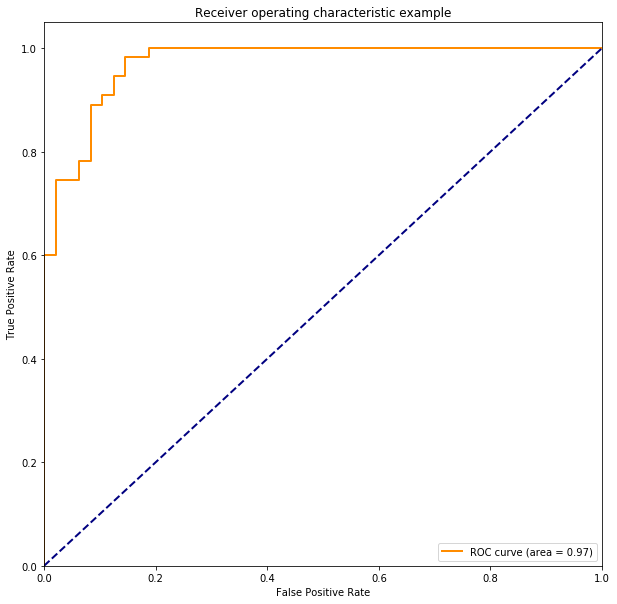

In [7]:
%matplotlib inline
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time
import matplotlib.pyplot as plt

# 分两类

# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())
feature=feature.iloc[:, 2:9]
# display(feature)
# -1变0
flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)

Kernel='linear'

# 划分训练集测试集
X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=1)   
# 搭建svm模型
svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                max_iter=-1, decision_function_shape=None,random_state=None)
# 训练模型
print('Training begin...')
start=time.clock()

y_score = svm_clf.fit(X_train, y_train).decision_function(X_test)
end=time.clock()
print('Training finish')
print('Train Time: ',end-start)

# 测试模型
y_pre = svm_clf.predict(X_test)
#     print('y_predict', y_pre)
#     print('y_true', y_test)
# 计算准确率

fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

target=['0','1']
print('所用核为：',Kernel)
print('准确率：',accuracy_score(y_test,y_pre))
print('报告',classification_report(y_test,y_pre,target_names=target))
print('auc',roc_auc)


# print("支持向量指数:",svm_clf.support_)
# print("支持向量",svm_clf.support_vectors_)
# print("每一类的支持向量个数",svm_clf.n_support_)
# print("支持向量的系数:",svm_clf.dual_coef_)
print("支持向量的权重:",svm_clf.coef_)
# print("截距:",svm_clf.intercept_)


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [44]:
# 决策树
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time


# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')
feature=feature.iloc[:, 2:9]
# display(feature)
# 归一化
# feature['num']=(feature['num']-feature['num'].min())/(feature['num'].max()-feature['num'].min())
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())

# 分三类
# display(feature)     

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
importance=np.array([0.,0.,0.,0.,0.,0.])
# importance=np.array([0.,0.,0.,0.,0.])

for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    clf = tree.DecisionTreeClassifier(criterion='entropy')  
    # 训练模型
    print('Training begin...')
    start=time.clock()
    clf.fit(X_train, y_train) 
#     特征重要性
    importance+=clf.feature_importances_
#     print(clf.feature_importances_)  
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = clf.predict(X_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1

    print('预测正确个数', sum)

    rate.append(sum/len(y_test))
#     print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('特征重要性：',importance/epoch)        
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)

flag
-1.0     54
 0.0    204
 1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.0027121999999053514
预测正确个数 89
Training begin...
Training finish
Train Time:  0.0029640000000199507
预测正确个数 91
Training begin...
Training finish
Train Time:  0.006024900000056732
预测正确个数 91
Training begin...
Training finish
Train Time:  0.0029042999999546737
预测正确个数 89
Training begin...
Training finish
Train Time:  0.002175300000089919
预测正确个数 87
Training begin...
Training finish
Train Time:  0.0038220999999794003
预测正确个数 87
Training begin...
Training finish
Train Time:  0.003346899999996822
预测正确个数 89
Training begin...
Training finish
Train Time:  0.003956000000016502
预测正确个数 93
Training begin...
Training finish
Train Time:  0.002963099999988117
预测正确个数 90
Training begin...
Training finish
Train Time:  0.0029289999999946303
预测正确个数 89
Training begin...
Training finish
Train Time:  0.0028585000000020955
预测正确个数 86
Training begin...
Training finish
Train Time:  0.003455900000062684
预测正确个数 90
Training begin...
Training finish
Train Time:  0.002296099

In [45]:
# 决策树
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time


# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')
feature=feature.iloc[:, 2:9]
# display(feature)
# 归一化
# feature['num']=(feature['num']-feature['num'].min())/(feature['num'].max()-feature['num'].min())
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())

# 分两类
# display(feature)
# -1变0
flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
importance=np.array([0.,0.,0.,0.,0.,0.])
# importance=np.array([0.,0.,0.,0.,0.])

for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    clf = tree.DecisionTreeClassifier(criterion='entropy')  
    # 训练模型
    print('Training begin...')
    start=time.clock()
    clf.fit(X_train, y_train) 
#     特征重要性
    importance+=clf.feature_importances_
#     print(clf.feature_importances_)  
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = clf.predict(X_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1

    print('预测正确个数', sum)

    rate.append(sum/len(y_test))
#     print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('特征重要性：',importance/epoch)        
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)

flag
0.0    258
1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.0024444999999104766
预测正确个数 92
Training begin...
Training finish
Train Time:  0.0021497000000181288
预测正确个数 94
Training begin...
Training finish
Train Time:  0.00246789999982866
预测正确个数 94
Training begin...
Training finish
Train Time:  0.0019973000000845786
预测正确个数 97
Training begin...
Training finish
Train Time:  0.002158800000188421
预测正确个数 91
Training begin...
Training finish
Train Time:  0.002530399999841393
预测正确个数 89
Training begin...
Training finish
Train Time:  0.001915300000064235
预测正确个数 93
Training begin...
Training finish
Train Time:  0.0024090999997952167
预测正确个数 96
Training begin...
Training finish
Train Time:  0.002000300000190691
预测正确个数 95
Training begin...
Training finish
Train Time:  0.0017299999999522697
预测正确个数 95
Training begin...
Training finish
Train Time:  0.0017299999999522697
预测正确个数 88
Training begin...
Training finish
Train Time:  0.002671599999985119
预测正确个数 94
Training begin...
Training finish
Train Time:  0.0020426999

In [6]:
# 决策树
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time


# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')
feature=feature.iloc[:, 2:9]
# display(feature)
# 归一化
# feature['num']=(feature['num']-feature['num'].min())/(feature['num'].max()-feature['num'].min())
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())

# 分两类
# display(feature)
# -1变0
flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
importance=np.array([0.,0.,0.,0.,0.,0.])
# importance=np.array([0.,0.,0.,0.,0.])

for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    clf = tree.DecisionTreeClassifier(criterion='entropy')  
    # 训练模型
    print('Training begin...')
    start=time.clock()
    clf.fit(X_train, y_train) 
#     特征重要性
    importance+=clf.feature_importances_
#     print(clf.feature_importances_)  
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = clf.predict(X_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1

    print('预测正确个数', sum)

    rate.append(sum/len(y_test))
#     print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('特征重要性：',importance/epoch)        
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)

flag
0.0    258
1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.0028713000000379907
预测正确个数 92
Training begin...
Training finish
Train Time:  0.002719200000001365
预测正确个数 89
Training begin...
Training finish
Train Time:  0.0022321999999803666
预测正确个数 94
Training begin...
Training finish
Train Time:  0.002769199999988814
预测正确个数 95
Training begin...
Training finish
Train Time:  0.0019702000000165754
预测正确个数 91
Training begin...
Training finish
Train Time:  0.001645599999960723
预测正确个数 89
Training begin...
Training finish
Train Time:  0.0016608999999903062
预测正确个数 92
Training begin...
Training finish
Train Time:  0.002269699999999375
预测正确个数 96
Training begin...
Training finish
Train Time:  0.002140499999995882
预测正确个数 97
Training begin...
Training finish
Train Time:  0.001749299999971754
预测正确个数 93
Training begin...
Training finish
Train Time:  0.0017114999999989777
预测正确个数 88
Training begin...
Training finish
Train Time:  0.0018552000000227054
预测正确个数 94
Training begin...
Training finish
Train Time:  0.002381600

In [20]:
# 合并数据(赛事房间+直播房间)
import pandas as pd
data1=pd.read_csv(r'../data/room36252/new_flagfeature_final_room36252danmu0318.csv')
data2=pd.read_csv(r'../data/room911/feature_final_room911danmu0206.csv')
# display(data1)
# display(data2)
dele1=[]
dele2=[]
dele=[]
for index,row in data1.iterrows():
    if row['uncertain']==2:
        dele1.append(index)
data1.drop(index=dele1,inplace=True)

for index,row in data2.iterrows():
    if row['uncertain']==2:
        dele2.append(index)
data2.drop(index=dele2,inplace=True)

data1.dropna(subset=['flag'],inplace=True)
data2.dropna(subset=['flag'],inplace=True)
# display(data1)
# display(data2)
group1=data1.groupby('flag')
group2=data2.groupby('flag')
display(group1.size(),group2.size())
new_data=data1.append(data2)
group=new_data.groupby('flag')
display(group.size())
# display(new_data)
new_data.to_csv(r'../data/ml_danmu_frag.csv',index=None)


flag
-1     50
 0    153
 1    168
dtype: int64

flag
-1.0     4
 0.0    51
 1.0    88
dtype: int64

flag
-1.0     54
 0.0    204
 1.0    256
dtype: int64

In [9]:
# 用已有模型预测
import pandas as pd
import numpy as np
from sklearn.externals import joblib
data=pd.read_csv(r'../data/room911/feature_frag_room911danmu0209.csv')
# data

model_save_path = r"../code/model_save/"   
save_path_name=model_save_path+"svm_"+"train_model.model"
svm_clf = joblib.load(save_path_name)

feature=data.iloc[:, 2:8]
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())
X=np.array(feature)
label=svm_clf.predict(X)
data['predict']=label
display(data)

# for index,row in data.iterrows():
#     if row['predict']==-1:
#         print(data.loc[index])

time                                               2020-02-09 19:40
danmu             ['666', '你这太强了吧', '666', '今天不五排吗?今天不五排吗?', '66...
num                                                            2831
avg_score                                                -0.0991699
pos_avg_score                                              0.377428
pos_proportion                                             0.319322
neg_avg_score                                             -0.476598
neg_proportion                                             0.462381
predict                                                          -1
Name: 53, dtype: object
time                                               2020-02-09 19:41
danmu             ['你这个小建人', '贱人', '渣男', '渣男', '???', '渣男', '你好骚...
num                                                            5332
avg_score                                                 -0.155969
pos_avg_score                                              0.252274
pos_proportion          

In [2]:
# 用已有模型预测
import pandas as pd
import numpy as np
from sklearn.externals import joblib
data=pd.read_csv(r'../data/room911/feature_frag_room911danmu0209.csv')
# data

model_save_path = r"../code/model_save/"   
save_path_name=model_save_path+"svm_"+"train_model.model"
svm_clf = joblib.load(save_path_name)

feature=data.iloc[:, 2:8]
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())
X=np.array(feature)
label=svm_clf.predict(X)
data['predict']=label
display(data)

# for index,row in data.iterrows():
#     if row['predict']==-1:
#         print(data.loc[index])

E:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


,time,danmu,num,avg_score,pos_avg_score,pos_proportion,neg_avg_score,neg_proportion,predict
0,2020-02-09 18:40,"['纯白说粗口 你怎么看', '大气', '我钻石1晋级赛打了三次', '来了', '嗯嗯'...",195,0.505128,0.708974,0.589744,-0.203846,0.174359,1.0
1,2020-02-09 18:41,"['侠客行', '交了一个男朋友开心', '哈哈哈 舒服了', '你天天迟到良心不疼吗', ...",301,0.554817,0.709302,0.548173,-0.154485,0.142857,1.0
2,2020-02-09 18:42,"['优秀', '我对象漏气了求安慰3', '???', '你慌了', '就很棒', '说的对...",211,0.297393,0.534360,0.436019,-0.236967,0.199052,1.0
3,2020-02-09 18:43,"['今天状态不错呀', '各位晚上好啊', '666', '小白你为啥不去参加终极高手', ...",147,0.551020,0.724490,0.496599,-0.173469,0.163265,1.0
4,2020-02-09 18:44,"['666', '❤❤❤', '晚上好', '我去撞你了', '哈哈哈', '哈哈哈 舒服了...",162,0.316358,0.566358,0.469136,-0.250000,0.172840,1.0
5,2020-02-09 18:45,"['孬', '111', '哈哈哈', '玩的好不如排的好', '一个终结花里胡哨', '哈...",251,0.359562,0.562749,0.462151,-0.203187,0.183267,1.0
6,2020-02-09 18:46,"['是我卡嘛', '为啥白起mvp呢', '我要5级了', '每个位置会就', '这一刀就很...",141,0.040780,0.402482,0.312057,-0.361702,0.290780,0.0
7,2020-02-09 18:47,"['五排吗今天', '臭弟弟厉害', '现在打暗信的多', '骚白有粉丝群吗', '敏敏',...",225,0.448889,0.611111,0.471111,-0.162222,0.137778,1.0
8,2020-02-09 18:48,"['你真的秀', '感谢感谢', '钻石好的话就好坏的话死的心都有', '捐款了吗', '6...",165,0.351515,0.421212,0.363636,-0.069697,0.066667,0.0
9,2020-02-09 18:49,"['大气', '666', '荧光棒✨荧光棒✨荧光棒✨荧光棒✨荧光棒✨', '加速?', '...",179,0.254190,0.402235,0.363128,-0.148045,0.139665,0.0


In [48]:
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

# 分三类

# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')

feature=feature.iloc[:, 2:9]
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())
# display(feature)
num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
precision=[]
recall=[]
f1=[]

Kernel='linear'
epoch=1000

meantime=0
for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                    probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                    max_iter=-1, decision_function_shape=None,random_state=None)
    # 训练模型
    print('Training begin...')
    start=time.clock()
    svm_clf.fit(X_train, y_train) 
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = svm_clf.predict(X_test)
  
    # 计算准确率
    accuracy=accuracy_score(y_test,y_pre)
    print('epoch[', k+1, '] ', accuracy)
    rate.append(accuracy)
    print('')
    
    # 计算精准率、召回率、f1
#     print(classification_report(y_test, y_pre,output_dict=False))
#     print(classification_report(y_test, y_pre,output_dict=True))
    report=classification_report(y_test, y_pre,output_dict=True)
    precision.append(report['weighted avg']['precision'])
    f1.append(report['weighted avg']['f1-score'])
#     recall.append(report['weighted avg']['recall'])

    
    # 计算混淆矩阵
#     print(confusion_matrix(y_test,y_pre))

    
    
       
print('所用核为：',Kernel)

print('平均准确率：', sum(rate)/len(rate))
print('平均精准率：', sum(precision)/len(precision))
print('平均f1值：', sum(f1)/len(f1))
print('平均训练用时：', meantime/epoch)



flag
-1.0     54
 0.0    204
 1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.003314299998237402
epoch[ 1 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.002510199999960605
epoch[ 2 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.002895699999498902
epoch[ 3 ]  0.9320388349514563

Training begin...
Training finish
Train Time:  0.0023254999996424885
epoch[ 4 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0021757999984401977
epoch[ 5 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.002314400000614114
epoch[ 6 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.0024580999997851904
epoch[ 7 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0025241000003006775
epoch[ 8 ]  0.9320388349514563

Training begin...
Training finish
Train Time:  0.0021856999992451165
epoch[ 9 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.002446300000883639
epoch[ 10 ]  0.9029126213592

Training begin...
Training finish
Train Time:  0.0029727999990427634
epoch[ 87 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.002280500000779284
epoch[ 88 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002193500000430504
epoch[ 89 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.003928199999791104
epoch[ 90 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.003381600001375773
epoch[ 91 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.0020629000009648735
epoch[ 92 ]  0.8252427184466019

Training begin...
Training finish
Train Time:  0.0023404000003210967
epoch[ 93 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0021505000004253816
epoch[ 94 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.003066499999476946
epoch[ 95 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0022480999996332685
epoch[ 96 ]  0.84466

Training begin...
Training finish
Train Time:  0.0022260000005189795
epoch[ 174 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0026443000006111106
epoch[ 175 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.0033714000001054956
epoch[ 176 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.00277279999863822
epoch[ 177 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0029090000007272465
epoch[ 178 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0032267000005958835
epoch[ 179 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.0025793000004341593
epoch[ 180 ]  0.7961165048543689

Training begin...
Training finish
Train Time:  0.003209200000128476
epoch[ 181 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0027009000004909467
epoch[ 182 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0025117999994108686
epoch[ 

epoch[ 263 ]  0.8058252427184466

Training begin...
Training finish
Train Time:  0.0024859999994077953
epoch[ 264 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.0020380000005388865
epoch[ 265 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0025846000007732073
epoch[ 266 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0024261999988084426
epoch[ 267 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.002497600000424427
epoch[ 268 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.0030299999998533167
epoch[ 269 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0031608999997843057
epoch[ 270 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.003059800001210533
epoch[ 271 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.002661200000147801
epoch[ 272 ]  0.8737864077669902

Training begin...
Training finish
Train Tim

Training begin...
Training finish
Train Time:  0.0028091999993193895
epoch[ 356 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.003834699999060831
epoch[ 357 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.0022760000010748627
epoch[ 358 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.0027423999999882653
epoch[ 359 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0027473999998619547
epoch[ 360 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.002629099999467144
epoch[ 361 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0021075999993627192
epoch[ 362 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.0022059000002627727
epoch[ 363 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.002375699999902281
epoch[ 364 ]  0.9320388349514563

Training begin...
Training finish
Train Time:  0.0022869999993417878
epoch[ 36

Training begin...
Training finish
Train Time:  0.0026782999993884005
epoch[ 450 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.00382279999939783
epoch[ 451 ]  0.9514563106796117

Training begin...
Training finish
Train Time:  0.002232100001492654
epoch[ 452 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0030394000004889676
epoch[ 453 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.0022592000004806323
epoch[ 454 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0023748000003251946
epoch[ 455 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.0025729999997565756
epoch[ 456 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0027677999987645308
epoch[ 457 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.002517700000680634
epoch[ 458 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0025378999998793006
epoch[ 45

Training begin...
Training finish
Train Time:  0.003594800000428222
epoch[ 543 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.002768899999864516
epoch[ 544 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.002214200001617428
epoch[ 545 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0021551999998337124
epoch[ 546 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.002490699998816126
epoch[ 547 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.002853500000128406
epoch[ 548 ]  0.9320388349514563

Training begin...
Training finish
Train Time:  0.0020690999990620185
epoch[ 549 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.002469500001097913
epoch[ 550 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0025021000001288485
epoch[ 551 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0031415000012202654
epoch[ 552 

Training begin...
Training finish
Train Time:  0.00289859999975306
epoch[ 637 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0035354999999981374
epoch[ 638 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.002445800000714371
epoch[ 639 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0023681000002397923
epoch[ 640 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.0021261000001686625
epoch[ 641 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.0019969000004493864
epoch[ 642 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.002809200001138379
epoch[ 643 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0027656999991449993
epoch[ 644 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0025076000001718057
epoch[ 645 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0025422999988222728
epoch[ 6

Training begin...
Training finish
Train Time:  0.0026705000000220025
epoch[ 730 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0028566999990289332
epoch[ 731 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.0025361999996675877
epoch[ 732 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.00243159999990894
epoch[ 733 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0025587999989511445
epoch[ 734 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.002297099999850616
epoch[ 735 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.002403000000413158
epoch[ 736 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.0022289999997155974
epoch[ 737 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0027508999992278405
epoch[ 738 ]  0.8252427184466019

Training begin...
Training finish
Train Time:  0.0021582999997917796
epoch[ 7

Training finish
Train Time:  0.002525199999581673
epoch[ 823 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.0030813000012130942
epoch[ 824 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0021379999998316634
epoch[ 825 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0023261000005732058
epoch[ 826 ]  0.8155339805825242

Training begin...
Training finish
Train Time:  0.0022209999988263007
epoch[ 827 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.002775800001472817
epoch[ 828 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0021575999999186024
epoch[ 829 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.002685899999050889
epoch[ 830 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002631699999255943
epoch[ 831 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.00207589999990887
epoch[ 832 ]  0.7961165048543

Training begin...
Training finish
Train Time:  0.0029780999993818114
epoch[ 917 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0036451999985729344
epoch[ 918 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.0029352000001381384
epoch[ 919 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0024829000012687175
epoch[ 920 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.002110999999786145
epoch[ 921 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0027982999999949243
epoch[ 922 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.00211210000088613
epoch[ 923 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0024425999999948544
epoch[ 924 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.001954400000613532
epoch[ 925 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0018660999994608574
epoch[ 92

In [49]:
# 决策树
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time


# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')
feature=feature.iloc[:, 2:9]
# display(feature)
# 归一化
# feature['num']=(feature['num']-feature['num'].min())/(feature['num'].max()-feature['num'].min())
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())

# 分三类
# display(feature)     

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
precision=[]
f1=[]
epoch=1000

meantime=0
importance=np.array([0.,0.,0.,0.,0.,0.])
# importance=np.array([0.,0.,0.,0.,0.])

for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    clf = tree.DecisionTreeClassifier(criterion='entropy')  
    # 训练模型
    print('Training begin...')
    start=time.clock()
    clf.fit(X_train, y_train) 
#     print(clf.feature_importances_)  
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    #     特征重要性
    importance+=clf.feature_importances_
    # 测试模型
    y_pre = clf.predict(X_test)
    # 计算准确率   
    local_rate=accuracy_score(y_test,y_pre)
    rate.append(local_rate)
    
     # 计算精准率、召回率、f1
#     print(classification_report(y_test, y_pre,output_dict=False))
#     print(classification_report(y_test, y_pre,output_dict=True))
    report=classification_report(y_test, y_pre,output_dict=True)
    precision.append(report['weighted avg']['precision'])
    f1.append(report['weighted avg']['f1-score'])

   
    
print('特征重要性：',importance/epoch)
print('平均准确率：', sum(rate)/epoch)
print('平均精准率：', sum(precision)/len(precision))
print('平均f1值：', sum(f1)/len(f1))
print('平均训练用时：', meantime/epoch)

flag
-1.0     54
 0.0    204
 1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.0030815000009170035
Training begin...
Training finish
Train Time:  0.0025302999983978225
Training begin...
Training finish
Train Time:  0.0025120999998762272
Training begin...
Training finish
Train Time:  0.002458400000250549
Training begin...
Training finish
Train Time:  0.0022551999991264893
Training begin...
Training finish
Train Time:  0.002282299999933457
Training begin...
Training finish
Train Time:  0.0024534000003768597
Training begin...
Training finish
Train Time:  0.002363300000070012
Training begin...
Training finish
Train Time:  0.0024990000001707813
Training begin...
Training finish
Train Time:  0.00238800000079209
Training begin...
Training finish
Train Time:  0.0023175999995146412
Training begin...
Training finish
Train Time:  0.002976699999635457
Training begin...
Training finish
Train Time:  0.0022836000007373514
Training begin...
Training finish
Train Time:  0.002701500001421664
Training begin...
Training finish
Train T

Training begin...
Training finish
Train Time:  0.002430599999570404
Training begin...
Training finish
Train Time:  0.0033203999992110766
Training begin...
Training finish
Train Time:  0.0028101999996579252
Training begin...
Training finish
Train Time:  0.002575099999376107
Training begin...
Training finish
Train Time:  0.002523000001019682
Training begin...
Training finish
Train Time:  0.002269999999043648
Training begin...
Training finish
Train Time:  0.0024802999996609287
Training begin...
Training finish
Train Time:  0.0022147999989101663
Training begin...
Training finish
Train Time:  0.002291999999215477
Training begin...
Training finish
Train Time:  0.0022998999993433245
Training begin...
Training finish
Train Time:  0.0023462999997718725
Training begin...
Training finish
Train Time:  0.002307499999005813
Training begin...
Training finish
Train Time:  0.0021165999987715622
Training begin...
Training finish
Train Time:  0.00222100000064529
Training begin...
Training finish
Train Ti

Training begin...
Training finish
Train Time:  0.0024092999992717523
Training begin...
Training finish
Train Time:  0.002566899998782901
Training begin...
Training finish
Train Time:  0.0029818000002705958
Training begin...
Training finish
Train Time:  0.0023390999995172024
Training begin...
Training finish
Train Time:  0.002409000000625383
Training begin...
Training finish
Train Time:  0.003472800000963616
Training begin...
Training finish
Train Time:  0.0024069999999483116
Training begin...
Training finish
Train Time:  0.0022974000003159745
Training begin...
Training finish
Train Time:  0.002217400000517955
Training begin...
Training finish
Train Time:  0.002111599998897873
Training begin...
Training finish
Train Time:  0.0023322999986703508
Training begin...
Training finish
Train Time:  0.002199000000473461
Training begin...
Training finish
Train Time:  0.001994300000660587
Training begin...
Training finish
Train Time:  0.001980199998797616
Training begin...
Training finish
Train Ti

Training begin...
Training finish
Train Time:  0.002504899999621557
Training begin...
Training finish
Train Time:  0.002644299998792121
Training begin...
Training finish
Train Time:  0.0022171999989950564
Training begin...
Training finish
Train Time:  0.002486499999577063
Training begin...
Training finish
Train Time:  0.0022589999989577336
Training begin...
Training finish
Train Time:  0.003137200001219753
Training begin...
Training finish
Train Time:  0.0023409999994328246
Training begin...
Training finish
Train Time:  0.002549999999246211
Training begin...
Training finish
Train Time:  0.0022541999987879535
Training begin...
Training finish
Train Time:  0.002000600001338171
Training begin...
Training finish
Train Time:  0.0022514000011142343
Training begin...
Training finish
Train Time:  0.002272100000482169
Training begin...
Training finish
Train Time:  0.0041661000013846206
Training begin...
Training finish
Train Time:  0.0025747999989107484
Training begin...
Training finish
Train T

Training finish
Train Time:  0.004267099999196944
Training begin...
Training finish
Train Time:  0.0035734000011871103
Training begin...
Training finish
Train Time:  0.0027704000003723195
Training begin...
Training finish
Train Time:  0.0026127999990421813
Training begin...
Training finish
Train Time:  0.0023271999998542015
Training begin...
Training finish
Train Time:  0.0023905999987618998
Training begin...
Training finish
Train Time:  0.0030323999999382067
Training begin...
Training finish
Train Time:  0.0024897999992390396
Training begin...
Training finish
Train Time:  0.00269520000074408
Training begin...
Training finish
Train Time:  0.0024835000003804453
Training begin...
Training finish
Train Time:  0.002698700000109966
Training begin...
Training finish
Train Time:  0.0023390999995172024
Training begin...
Training finish
Train Time:  0.0025406000004295493
Training begin...
Training finish
Train Time:  0.0026748000000225147
Training begin...
Training finish
Train Time:  0.0029121

Training begin...
Training finish
Train Time:  0.0028113999997003702
Training begin...
Training finish
Train Time:  0.0031261999993148493
Training begin...
Training finish
Train Time:  0.0022420999994210433
Training begin...
Training finish
Train Time:  0.0023743000001559267
Training begin...
Training finish
Train Time:  0.002209700000094017
Training begin...
Training finish
Train Time:  0.0021369999994931277
Training begin...
Training finish
Train Time:  0.0026233999997202773
Training begin...
Training finish
Train Time:  0.0027266999986750307
Training begin...
Training finish
Train Time:  0.0025088999991567107
Training begin...
Training finish
Train Time:  0.0031618000011803815
Training begin...
Training finish
Train Time:  0.002258300000903546
Training begin...
Training finish
Train Time:  0.00232030000006489
Training begin...
Training finish
Train Time:  0.0026694999996834667
Training begin...
Training finish
Train Time:  0.0025681999995867955
Training begin...
Training finish
Trai

Training begin...
Training finish
Train Time:  0.002844500000719563
Training begin...
Training finish
Train Time:  0.003933300000426243
Training begin...
Training finish
Train Time:  0.0024285999988933327
Training begin...
Training finish
Train Time:  0.0033910000001924345
Training begin...
Training finish
Train Time:  0.0021152999997866573
Training begin...
Training finish
Train Time:  0.0024563999995734775
Training begin...
Training finish
Train Time:  0.002428699999654782
Training begin...
Training finish
Train Time:  0.0026733000013337005
Training begin...
Training finish
Train Time:  0.0023452999994333368
Training begin...
Training finish
Train Time:  0.002175600000555278
Training begin...
Training finish
Train Time:  0.002522199998566066
Training begin...
Training finish
Train Time:  0.00282599999991362
Training begin...
Training finish
Train Time:  0.0029811999993398786
Training begin...
Training finish
Train Time:  0.002346699999179691
Training begin...
Training finish
Train Ti

Training finish
Train Time:  0.0034434000008332077
Training begin...
Training finish
Train Time:  0.00309930000003078
Training begin...
Training finish
Train Time:  0.0029429000005620765
Training begin...
Training finish
Train Time:  0.0024203999983001268
Training begin...
Training finish
Train Time:  0.0028210000000399305
Training begin...
Training finish
Train Time:  0.002231000000392669
Training begin...
Training finish
Train Time:  0.0023068999998940853
Training begin...
Training finish
Train Time:  0.0022196999998413958
Training begin...
Training finish
Train Time:  0.0021778999998787185
Training begin...
Training finish
Train Time:  0.002167300001019612
Training begin...
Training finish
Train Time:  0.0024950000006356277
Training begin...
Training finish
Train Time:  0.0029601000005641254
Training begin...
Training finish
Train Time:  0.0022654000003967667
Training begin...
Training finish
Train Time:  0.0022446000002673827
Training begin...
Training finish
Train Time:  0.0025134

In [64]:
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc,roc_auc_score  ###计算roc和auc

# 分两类

# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')

feature=feature.iloc[:, 2:9]
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())
# display(feature)

flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
precision=[]
recall=[]
f1=[]
auc_list=[]

Kernel='linear'
epoch=1000

meantime=0
for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                    probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                    max_iter=-1, decision_function_shape=None,random_state=None)
    # 训练模型
    print('Training begin...')
    start=time.clock()
    y_score = svm_clf.fit(X_train, y_train).decision_function(X_test)
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = svm_clf.predict(X_test)
  
    # 计算准确率
    accuracy=accuracy_score(y_test,y_pre)
    print('epoch[', k+1, '] ', accuracy)
    rate.append(accuracy)
    print('')
    
    # 计算精准率、召回率、f1
#     print(classification_report(y_test, y_pre,output_dict=False))
#     print(classification_report(y_test, y_pre,output_dict=True))
    report=classification_report(y_test, y_pre,output_dict=True)
    precision.append(report['weighted avg']['precision'])
    f1.append(report['weighted avg']['f1-score'])
#     recall.append(report['weighted avg']['recall'])

    
    # 计算混淆矩阵
#     print(confusion_matrix(y_test,y_pre))
    
    # 计算auc
#     fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
#     roc_auc = auc(fpr,tpr) ###计算auc的值
    roc_auc=roc_auc_score(y_test, y_score)
    auc_list.append(roc_auc)
       
print('所用核为：',Kernel)

print('平均准确率：', sum(rate)/len(rate))
print('平均精准率：', sum(precision)/len(precision))
print('平均f1值：', sum(f1)/len(f1))
print('平均auc值：', sum(auc_list)/len(auc_list))
print('平均训练用时：', meantime/epoch)



flag
0.0    258
1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.003774900000280468
epoch[ 1 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0030426999983319547
epoch[ 2 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0026905000013357494
epoch[ 3 ]  0.9514563106796117

Training begin...
Training finish
Train Time:  0.0020661999988078605
epoch[ 4 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0025156000010611024
epoch[ 5 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.0026593999973556492
epoch[ 6 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0020810999994864687
epoch[ 7 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.002009399999224115
epoch[ 8 ]  0.941747572815534

Training begin...
Training finish
Train Time:  0.0024372000007133465
epoch[ 9 ]  0.941747572815534

Training begin...
Training finish
Train Time:  0.0028488999996625353
epoch[ 10 ]  0.93203883495

Training finish
Train Time:  0.0022790000002714805
epoch[ 98 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002410299999610288
epoch[ 99 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.00265189999845461
epoch[ 100 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.003896600002917694
epoch[ 101 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0026978999994753394
epoch[ 102 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0019780000002356246
epoch[ 103 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002422000001388369
epoch[ 104 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0032479999972565565
epoch[ 105 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002013600002101157
epoch[ 106 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0024651999992784113
epoch[ 107 ]  0.89320388349514

Training finish
Train Time:  0.0027197000017622486
epoch[ 191 ]  0.941747572815534

Training begin...
Training finish
Train Time:  0.0028044999999110587
epoch[ 192 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.0024229000009654555
epoch[ 193 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0026051999993796926
epoch[ 194 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002833499998814659
epoch[ 195 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.003469700001005549
epoch[ 196 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0026594999981170986
epoch[ 197 ]  0.941747572815534

Training begin...
Training finish
Train Time:  0.003090300000621937
epoch[ 198 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.0019474000000627711
epoch[ 199 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0022876999973959755
epoch[ 200 ]  0.893203883495

Training begin...
Training finish
Train Time:  0.0021919999999227002
epoch[ 279 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0029261000017868355
epoch[ 280 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0024492999982612673
epoch[ 281 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.004646800000045914
epoch[ 282 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.003056300000025658
epoch[ 283 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0032690000007278286
epoch[ 284 ]  0.9611650485436893

Training begin...
Training finish
Train Time:  0.0023779000002832618
epoch[ 285 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0025430999994568992
epoch[ 286 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.0019855999998981133
epoch[ 287 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0037951999984215945
epoch[ 2

Training begin...
Training finish
Train Time:  0.003169500003423309
epoch[ 374 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.002257100000861101
epoch[ 375 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.0018966000025102403
epoch[ 376 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.001801900001737522
epoch[ 377 ]  0.941747572815534

Training begin...
Training finish
Train Time:  0.0018376999978499953
epoch[ 378 ]  0.8446601941747572

Training begin...
Training finish
Train Time:  0.0022300000018731225
epoch[ 379 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.002112699999997858
epoch[ 380 ]  0.941747572815534

Training begin...
Training finish
Train Time:  0.0017869000002974644
epoch[ 381 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.002279200001794379
epoch[ 382 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0021959999976388644
epoch[ 383 ] 

Training finish
Train Time:  0.0024818000019877218
epoch[ 459 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0024587000007159077
epoch[ 460 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.001777499997842824
epoch[ 461 ]  0.8252427184466019

Training begin...
Training finish
Train Time:  0.001859599997260375
epoch[ 462 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.002181100000598235
epoch[ 463 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.0021704000027966686
epoch[ 464 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.00249430000258144
epoch[ 465 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.002629399998113513
epoch[ 466 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0018931000013253652
epoch[ 467 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.0028696000008494593
epoch[ 468 ]  0.89320388349514

Training finish
Train Time:  0.0024747999996179715
epoch[ 550 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.002175499997974839
epoch[ 551 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0022754999990866054
epoch[ 552 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0018808000022545457
epoch[ 553 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.0025619999978516717
epoch[ 554 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.0018034999993687961
epoch[ 555 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0020105000003241003
epoch[ 556 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.001985999999305932
epoch[ 557 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0026335000002291054
epoch[ 558 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0022592999994230922
epoch[ 559 ]  0.90291262135922

Training begin...
Training finish
Train Time:  0.004976799998985371
epoch[ 640 ]  0.9320388349514563

Training begin...
Training finish
Train Time:  0.0032685000005585607
epoch[ 641 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0018992999976035208
epoch[ 642 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.002927800000179559
epoch[ 643 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002907599999161903
epoch[ 644 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.00294209999992745
epoch[ 645 ]  0.941747572815534

Training begin...
Training finish
Train Time:  0.0021147000006749295
epoch[ 646 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0036240000008547213
epoch[ 647 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.001961599999049213
epoch[ 648 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0024484999994456302
epoch[ 649 

Training begin...
Training finish
Train Time:  0.0027952000018558465
epoch[ 727 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0019021000007342082
epoch[ 728 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.002181599997129524
epoch[ 729 ]  0.8155339805825242

Training begin...
Training finish
Train Time:  0.001989499996852828
epoch[ 730 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.001750699997501215
epoch[ 731 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.002238299999589799
epoch[ 732 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.002220499998657033
epoch[ 733 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.002273000001878245
epoch[ 734 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.002094699997542193
epoch[ 735 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0026853000017581508
epoch[ 736 ]

Training begin...
Training finish
Train Time:  0.0027742999991460238
epoch[ 808 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.002199599999585189
epoch[ 809 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002318099999683909
epoch[ 810 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.002430900000035763
epoch[ 811 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.0022137999985716306
epoch[ 812 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0020194999997329433
epoch[ 813 ]  0.9320388349514563

Training begin...
Training finish
Train Time:  0.0018626999990374316
epoch[ 814 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.0021557000000029802
epoch[ 815 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0022283999969658908
epoch[ 816 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.0022224999993341044
epoch[ 81

Training finish
Train Time:  0.002821100002620369
epoch[ 889 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.002417200001218589
epoch[ 890 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.00254059999861056
epoch[ 891 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.003045999997993931
epoch[ 892 ]  0.883495145631068

Training begin...
Training finish
Train Time:  0.0020903000004182104
epoch[ 893 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002353799998672912
epoch[ 894 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.002671800000825897
epoch[ 895 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.00203220000184956
epoch[ 896 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.0023505999997723848
epoch[ 897 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  0.0020440000007511117
epoch[ 898 ]  0.941747572815534

Tr

epoch[ 974 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.00284299999839277
epoch[ 975 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002053700001852121
epoch[ 976 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0027649000003293622
epoch[ 977 ]  0.8932038834951457

Training begin...
Training finish
Train Time:  0.0027956999983871356
epoch[ 978 ]  0.9029126213592233

Training begin...
Training finish
Train Time:  0.002404200000455603
epoch[ 979 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.002657500001078006
epoch[ 980 ]  0.9223300970873787

Training begin...
Training finish
Train Time:  0.002082300001347903
epoch[ 981 ]  0.8640776699029126

Training begin...
Training finish
Train Time:  0.002149300002201926
epoch[ 982 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.0019653000017569866
epoch[ 983 ]  0.8737864077669902

Training begin...
Training finish
Train Time:  

In [65]:
# 决策树
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time


# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')
feature=feature.iloc[:, 2:9]
# display(feature)
# 归一化
# feature['num']=(feature['num']-feature['num'].min())/(feature['num'].max()-feature['num'].min())
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())

# 分两类
# display(feature)     

flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag    

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
precision=[]
f1=[]
auc_list=[]
epoch=1000

meantime=0
importance=np.array([0.,0.,0.,0.,0.,0.])
# importance=np.array([0.,0.,0.,0.,0.])

for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建决策树模型
    clf = tree.DecisionTreeClassifier(criterion='entropy')  
    # 训练模型
    print('Training begin...')
    start=time.clock()
    clf.fit(X_train, y_train)
#     print(clf.feature_importances_)  
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    #     特征重要性
    importance+=clf.feature_importances_
    # 测试模型
    y_pre = clf.predict(X_test)
    # 计算准确率   
    local_rate=accuracy_score(y_test,y_pre)
    rate.append(local_rate)
    
     # 计算精准率、召回率、f1
#     print(classification_report(y_test, y_pre,output_dict=False))
#     print(classification_report(y_test, y_pre,output_dict=True))
    report=classification_report(y_test, y_pre,output_dict=True)
    precision.append(report['weighted avg']['precision'])
    f1.append(report['weighted avg']['f1-score'])
    
   
   
    
print('特征重要性：',importance/epoch)
print('平均准确率：', sum(rate)/epoch)
print('平均精准率：', sum(precision)/len(precision))
print('平均f1值：', sum(f1)/len(f1))
print('平均训练用时：', meantime/epoch)

flag
0.0    258
1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.0027336999992257915
Training begin...
Training finish
Train Time:  0.001955799998540897
Training begin...
Training finish
Train Time:  0.002368200002820231
Training begin...
Training finish
Train Time:  0.0017821000001276843
Training begin...
Training finish
Train Time:  0.001973599999473663
Training begin...
Training finish
Train Time:  0.0019208000012440607
Training begin...
Training finish
Train Time:  0.0018780999998853076
Training begin...
Training finish
Train Time:  0.0024699999994481914
Training begin...
Training finish
Train Time:  0.001982400000997586
Training begin...
Training finish
Train Time:  0.0017655000010563526
Training begin...
Training finish
Train Time:  0.0032477999993716367
Training begin...
Training finish
Train Time:  0.001861500000813976
Training begin...
Training finish
Train Time:  0.0023388999979943037
Training begin...
Training finish
Train Time:  0.0017638999997870997
Training begin...
Training finish
Train

Training begin...
Training finish
Train Time:  0.002105299998220289
Training begin...
Training finish
Train Time:  0.0019031999981962144
Training begin...
Training finish
Train Time:  0.0034711000007519033
Training begin...
Training finish
Train Time:  0.0017965000006370246
Training begin...
Training finish
Train Time:  0.0018327999969187658
Training begin...
Training finish
Train Time:  0.0022696999985782895
Training begin...
Training finish
Train Time:  0.0018029000020760577
Training begin...
Training finish
Train Time:  0.0025535000022500753
Training begin...
Training finish
Train Time:  0.0018184000000474043
Training begin...
Training finish
Train Time:  0.0020172000004095025
Training begin...
Training finish
Train Time:  0.0024701999973331112
Training begin...
Training finish
Train Time:  0.0017977999996219296
Training begin...
Training finish
Train Time:  0.001943100000062259
Training begin...
Training finish
Train Time:  0.0017039000013028271
Training begin...
Training finish
Tr

Training begin...
Training finish
Train Time:  0.002733799999987241
Training begin...
Training finish
Train Time:  0.0022587999992538244
Training begin...
Training finish
Train Time:  0.003125700000964571
Training begin...
Training finish
Train Time:  0.0018877999973483384
Training begin...
Training finish
Train Time:  0.002030799998465227
Training begin...
Training finish
Train Time:  0.0021945000007690396
Training begin...
Training finish
Train Time:  0.0017780000016500708
Training begin...
Training finish
Train Time:  0.002144999998563435
Training begin...
Training finish
Train Time:  0.0017655999981798232
Training begin...
Training finish
Train Time:  0.0020223000028636307
Training begin...
Training finish
Train Time:  0.001888499999040505
Training begin...
Training finish
Train Time:  0.0020140000015089754
Training begin...
Training finish
Train Time:  0.001732699998683529
Training begin...
Training finish
Train Time:  0.0029066999995848164
Training begin...
Training finish
Train 

Training begin...
Training finish
Train Time:  0.0019419000018388033
Training begin...
Training finish
Train Time:  0.0024339999981748406
Training begin...
Training finish
Train Time:  0.0018816000010701828
Training begin...
Training finish
Train Time:  0.001700400000117952
Training begin...
Training finish
Train Time:  0.0019134000031044707
Training begin...
Training finish
Train Time:  0.002367299999605166
Training begin...
Training finish
Train Time:  0.0018055999971693382
Training begin...
Training finish
Train Time:  0.002247100001113722
Training begin...
Training finish
Train Time:  0.0016689000003680121
Training begin...
Training finish
Train Time:  0.0019917999998142477
Training begin...
Training finish
Train Time:  0.0018473999989510048
Training begin...
Training finish
Train Time:  0.0016195000025618356
Training begin...
Training finish
Train Time:  0.0018674999992072117
Training begin...
Training finish
Train Time:  0.0018453000011504628
Training begin...
Training finish
Tra

Training begin...
Training finish
Train Time:  0.0021019999985583127
Training begin...
Training finish
Train Time:  0.002394099999946775
Training begin...
Training finish
Train Time:  0.002205699998739874
Training begin...
Training finish
Train Time:  0.002547300002333941
Training begin...
Training finish
Train Time:  0.0019341999977768864
Training begin...
Training finish
Train Time:  0.0021314000005077105
Training begin...
Training finish
Train Time:  0.0019064000007347204
Training begin...
Training finish
Train Time:  0.0019913999967684504
Training begin...
Training finish
Train Time:  0.0025104000014835037
Training begin...
Training finish
Train Time:  0.002889899998990586
Training begin...
Training finish
Train Time:  0.0019734999987122137
Training begin...
Training finish
Train Time:  0.002793999999994412
Training begin...
Training finish
Train Time:  0.002100800000334857
Training begin...
Training finish
Train Time:  0.0019159000003128313
Training begin...
Training finish
Train 

Training begin...
Training finish
Train Time:  0.0022613000001001637
Training begin...
Training finish
Train Time:  0.0029042999994999263
Training begin...
Training finish
Train Time:  0.0020939999994880054
Training begin...
Training finish
Train Time:  0.0026699000009102747
Training begin...
Training finish
Train Time:  0.0018693999991228338
Training begin...
Training finish
Train Time:  0.002110100002028048
Training begin...
Training finish
Train Time:  0.002093899998726556
Training begin...
Training finish
Train Time:  0.001903599997604033
Training begin...
Training finish
Train Time:  0.002000599997700192
Training begin...
Training finish
Train Time:  0.0021283999994921032
Training begin...
Training finish
Train Time:  0.001677599997492507
Training begin...
Training finish
Train Time:  0.0016638000015518628
Training begin...
Training finish
Train Time:  0.0017884999979287386
Training begin...
Training finish
Train Time:  0.0017054999989341013
Training begin...
Training finish
Train

Training finish
Train Time:  0.00232020000112243
Training begin...
Training finish
Train Time:  0.0017600999999558553
Training begin...
Training finish
Train Time:  0.002262500001961598
Training begin...
Training finish
Train Time:  0.002690099998289952
Training begin...
Training finish
Train Time:  0.0019055999982811045
Training begin...
Training finish
Train Time:  0.0037211999988358
Training begin...
Training finish
Train Time:  0.0018318000002182089
Training begin...
Training finish
Train Time:  0.0028430999991542194
Training begin...
Training finish
Train Time:  0.0018640000016603153
Training begin...
Training finish
Train Time:  0.002162000000680564
Training begin...
Training finish
Train Time:  0.002993800000695046
Training begin...
Training finish
Train Time:  0.0020694000013463665
Training begin...
Training finish
Train Time:  0.0035403000001679175
Training begin...
Training finish
Train Time:  0.002062100000330247
Training begin...
Training finish
Train Time:  0.0026088000013

Training finish
Train Time:  0.003721699999005068
Training begin...
Training finish
Train Time:  0.0024539000005461276
Training begin...
Training finish
Train Time:  0.0018029999991995282
Training begin...
Training finish
Train Time:  0.0018958000000566244
Training begin...
Training finish
Train Time:  0.0016890999977476895
Training begin...
Training finish
Train Time:  0.002347699999518227
Training begin...
Training finish
Train Time:  0.0017556999991938937
Training begin...
Training finish
Train Time:  0.0017989000007219147
Training begin...
Training finish
Train Time:  0.0018878000009863172
Training begin...
Training finish
Train Time:  0.001593900000443682
Training begin...
Training finish
Train Time:  0.0016983999994408805
Training begin...
Training finish
Train Time:  0.0017681999997876119
Training begin...
Training finish
Train Time:  0.0019004999994649552
Training begin...
Training finish
Train Time:  0.0019099000019195955
Training begin...
Training finish
Train Time:  0.001648